<StemContainer object of 3 artists>

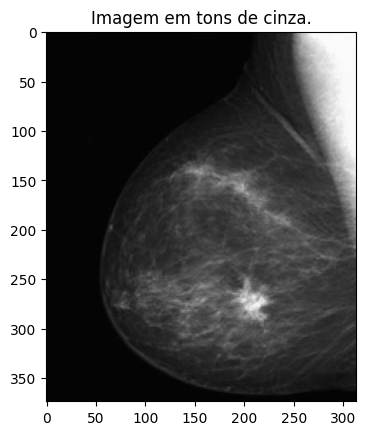

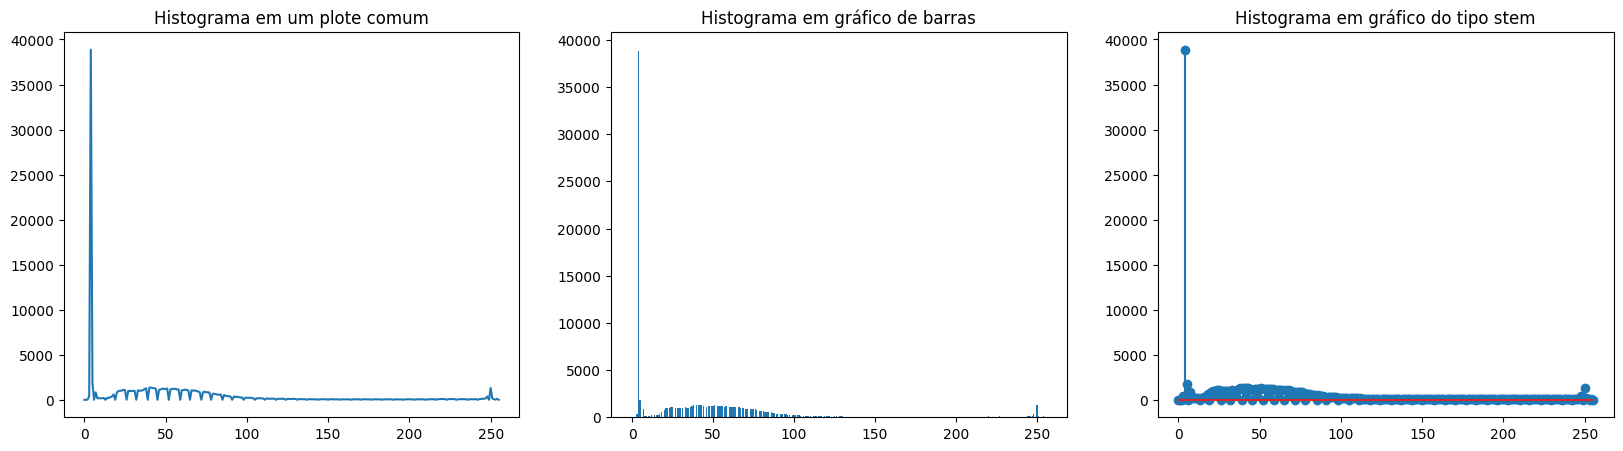

In [ ]:
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage import exposure
I = imread('Laboratorio_3_1.jpg',as_gray=True)
hist, bin_centers = exposure.histogram(I, normalize = False)
l = hist.shape
x = range(l[0]) #número de bins para visualizar o histograma da imagem I
plt.figure()
plt.title('Imagem em tons de cinza.')
plt.imshow(I,cmap='gray')
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
plt.title('Histograma em um plote comum')
plt.plot(x,hist)
plt.subplot(1,3,2)
plt.title('Histograma em gráfico de barras')
plt.bar(x,hist)
plt.subplot(1,3,3)
plt.title('Histograma em gráfico do tipo stem')
plt.stem(x,hist)

In [ ]:
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage import exposure

# Carrega a imagem em tons de cinza e inverte seus valores de intensidade
I = imread('Laboratorio_3_1.jpg',as_gray=True)
neg_I = exposure.invert(I)

# Calcula o histograma da imagem negativa
hist, bin_centers = exposure.histogram(neg_I, normalize=False)

# Encontra o índice do valor máximo do histograma
import numpy as np
idx = np.argmax(hist)

# Plota a imagem negativa e o histograma
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.title('Imagem negativa em tons de cinza.')
plt.imshow(neg_I,cmap='gray')
plt.subplot(1,2,2)
plt.title('Histograma da imagem negativa')
plt.stem(bin_centers, hist)
plt.xlabel('Intensidade de pixel')
plt.ylabel('Número de pixels')
plt.show()

print(f'O tom de cinza de maior frequência na imagem negativa é {bin_centers[idx]}, que aparece {hist[idx]} vezes.')


NameError: ignored

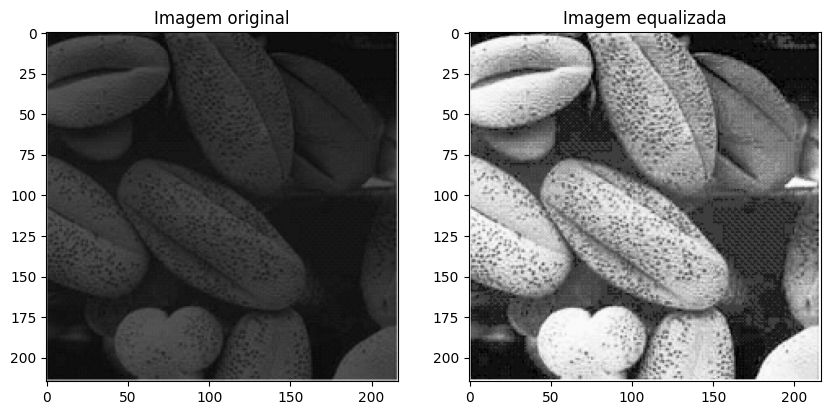

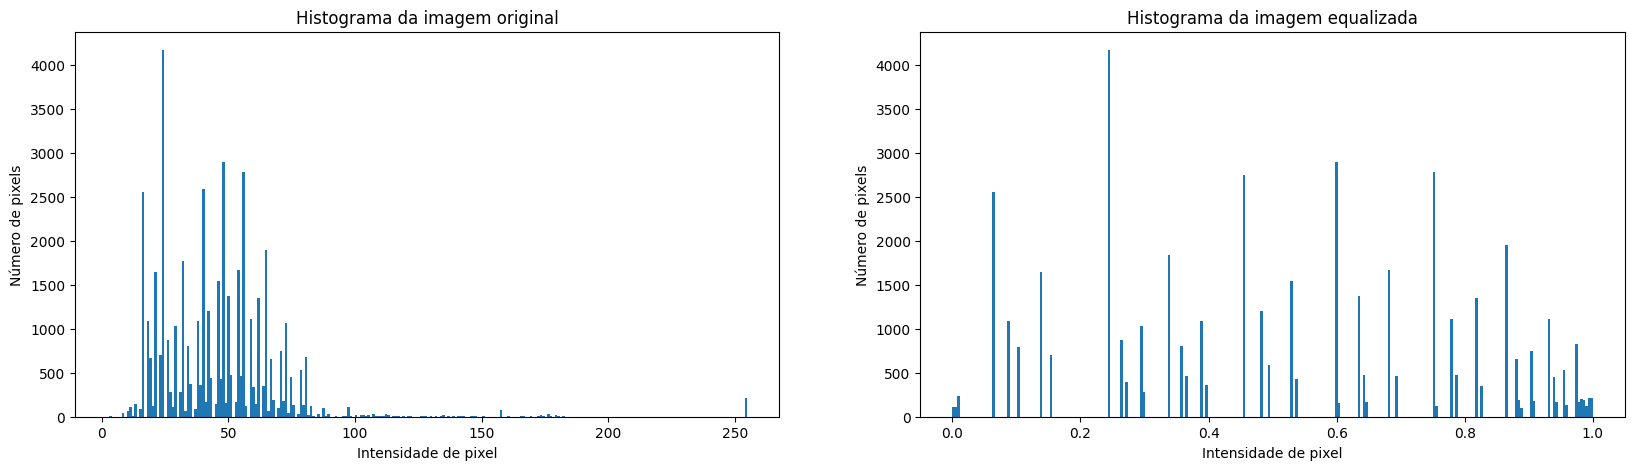

In [ ]:
from skimage.io import imread
from skimage import exposure
from matplotlib import pyplot as plt

# Carrega a imagem
I = imread('Laboratorio_3_2.bmp')

# Equaliza o histograma da imagem
Ieq = exposure.equalize_hist(I)

# Plota a imagem original e a imagem equalizada lado a lado
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
plt.imshow(I, cmap='gray')
plt.title('Imagem original')
plt.subplot(1, 2, 2)
plt.imshow(Ieq, cmap='gray')
plt.title('Imagem equalizada')

# Plota os histogramas da imagem original e da imagem equalizada
plt.figure(figsize=[20, 5])
plt.subplot(1, 2, 1)
plt.hist(I.ravel(), bins=256)
plt.title('Histograma da imagem original')
plt.xlabel('Intensidade de pixel')
plt.ylabel('Número de pixels')
plt.subplot(1, 2, 2)
plt.hist(Ieq.ravel(), bins=256)
plt.title('Histograma da imagem equalizada')
plt.xlabel('Intensidade de pixel')
plt.ylabel('Número de pixels')

plt.show()

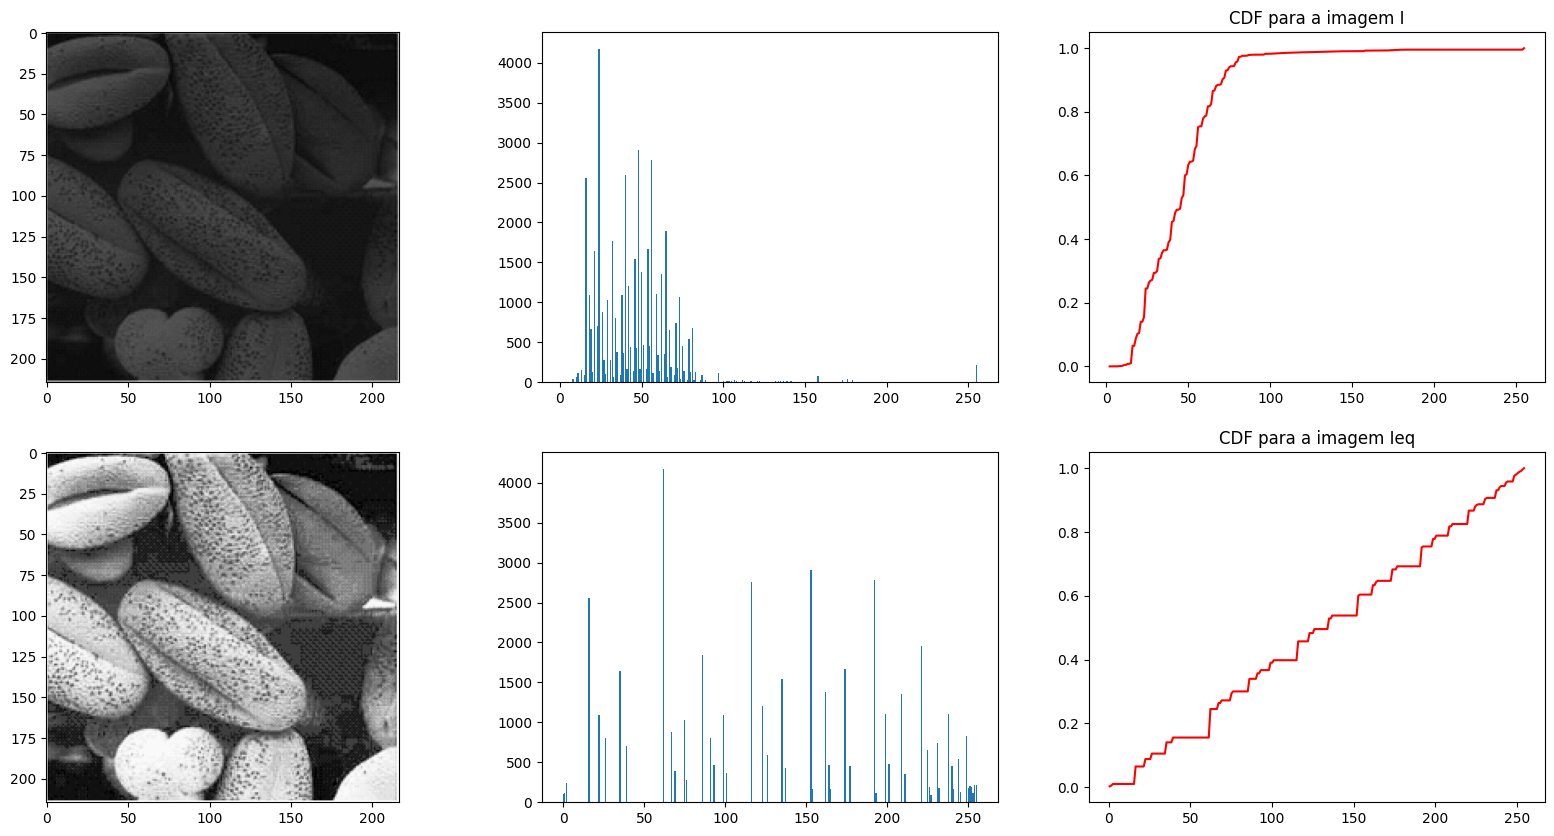

In [ ]:
I= imread('Laboratorio_3_2.bmp',as_gray=True)
hist_I, bin_centers_I = exposure.histogram(I) #histograma da imagem original
Ieq = exposure.equalize_hist(I)
hist_Ieq, bin_centers_Ieq = exposure.histogram(Ieq) #histograma da imagem equalizada
cdf_I,bins_I= exposure.cumulative_distribution(I)
cdf_Ieq,bins_Ieq= exposure.cumulative_distribution(Ieq)
li=hist_I.shape
leq=hist_Ieq.shape
xi=range(li[0]) # número de bins para visualizar o histograma da imagem I
xeq=range(leq[0]) # número de bins para visualizar o histograma da imagem Ieq
plt.figure(figsize=[20,10])
plt.subplot(2,3,1)
plt.imshow(I,cmap='gray')
plt.subplot(2,3,2)
plt.bar(bins_I,hist_I)
plt.subplot(2,3,3)
plt.title('CDF para a imagem I')
plt.plot(bins_I,cdf_I,'r')
plt.subplot(2,3,4)
plt.imshow(Ieq,cmap='gray')
plt.subplot(2,3,5)
plt.bar(xeq,hist_Ieq)
plt.subplot(2,3,6)
plt.title('CDF para a imagem Ieq')
plt.plot(bins_Ieq*255,cdf_Ieq,'r')
plt.show()

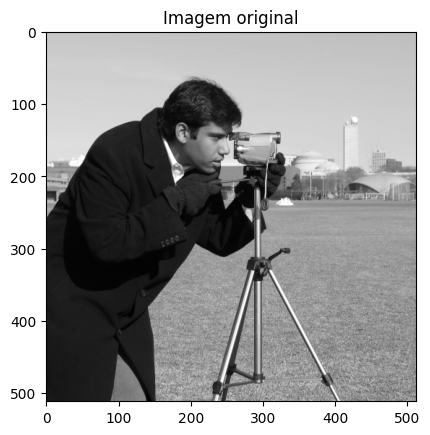

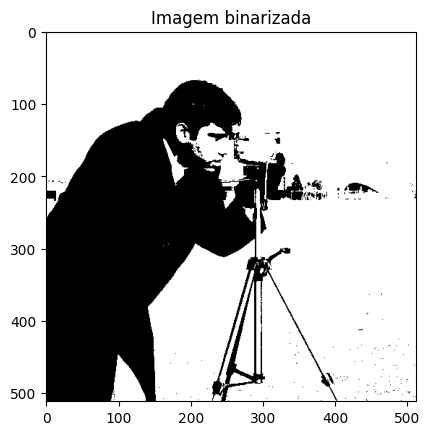

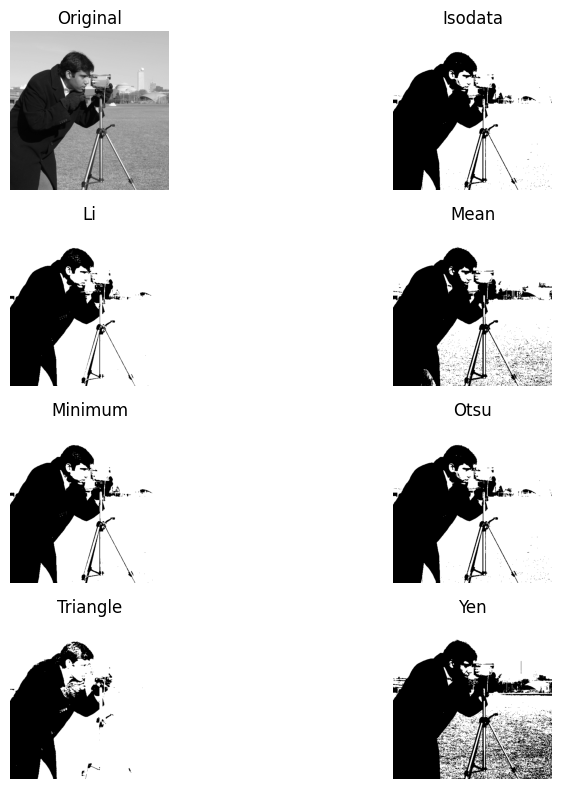

In [ ]:
from skimage import data, filters
import matplotlib.pyplot as plt

# Carrega a imagem camera da biblioteca skimage
I = data.camera()

# Visualiza a imagem original
plt.figure()
plt.imshow(I, cmap='gray')
plt.title('Imagem original')

# Obtém o limiar ótimo da imagem utilizando o método de Otsu
limiar = filters.threshold_otsu(I)

# Binariza a imagem utilizando o limiar obtido
I_bin = I > limiar

# Visualiza a imagem binarizada
plt.figure()
plt.imshow(I_bin, cmap='gray')
plt.title('Imagem binarizada')

# Compara visualmente o resultado obtido com outras técnicas de binarização
fig, ax = filters.try_all_threshold(I, figsize=(10, 8), verbose=False)
plt.show()

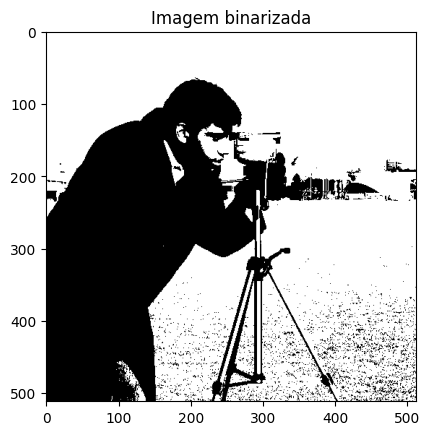

In [ ]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt

# Carrega a imagem camera da biblioteca skimage
I = data.camera()

# Define o limiar
limiar = 128

# Binariza a imagem utilizando o limiar definido
I_bin = np.zeros_like(I)
I_bin[I > limiar] = 1

# Visualiza a imagem binarizada
plt.figure()
plt.imshow(I_bin, cmap='gray')
plt.title('Imagem binarizada')

plt.show()

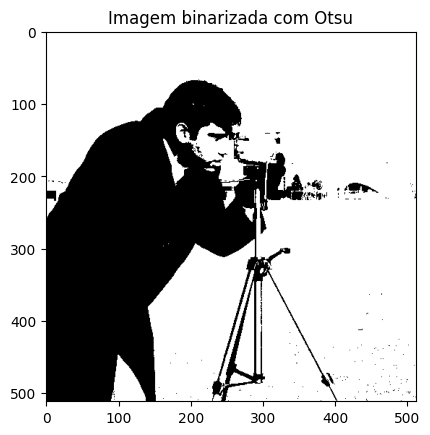

In [ ]:
from skimage import data
from skimage.filters import threshold_otsu
import numpy as np
import matplotlib.pyplot as plt

# Carrega a imagem camera da biblioteca skimage
I = data.camera()

# Calcula o limiar utilizando o algoritmo de Otsu
limiar_otsu = threshold_otsu(I)

# Binariza a imagem utilizando o limiar de Otsu
I_bin_otsu = np.zeros_like(I)
I_bin_otsu[I > limiar_otsu] = 1

# Visualiza a imagem binarizada
plt.figure()
plt.imshow(I_bin_otsu, cmap='gray')
plt.title('Imagem binarizada com Otsu')

plt.show()


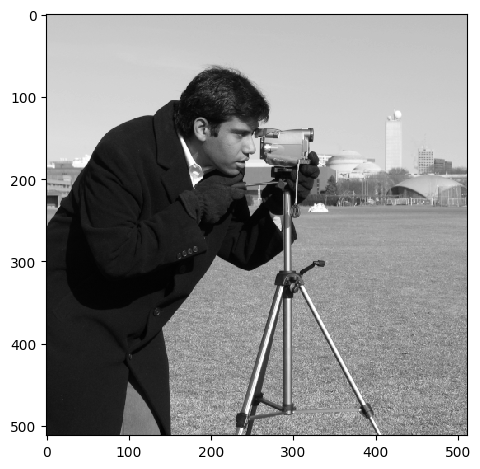

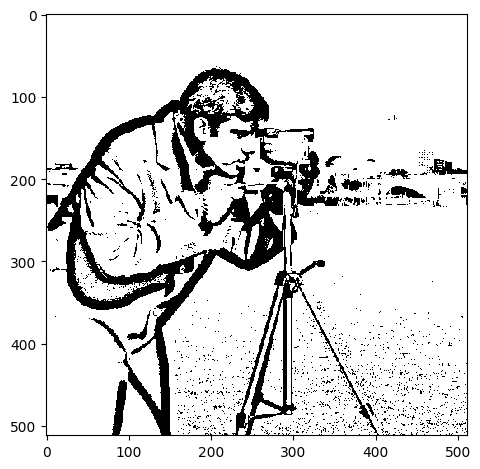

In [ ]:
from skimage.filters import threshold_sauvola
from skimage import data, io

# carrega a imagem da câmera
I = data.camera()

# calcula a versão binarizada usando o algoritmo de Sauvola
window_size = 25
k = 0.2
limiar3 = threshold_sauvola(I, window_size=window_size, k=k)

# exibe a imagem original e a versão binarizada
io.imshow(I)
io.show()
io.imshow(I > limiar3)
io.show()

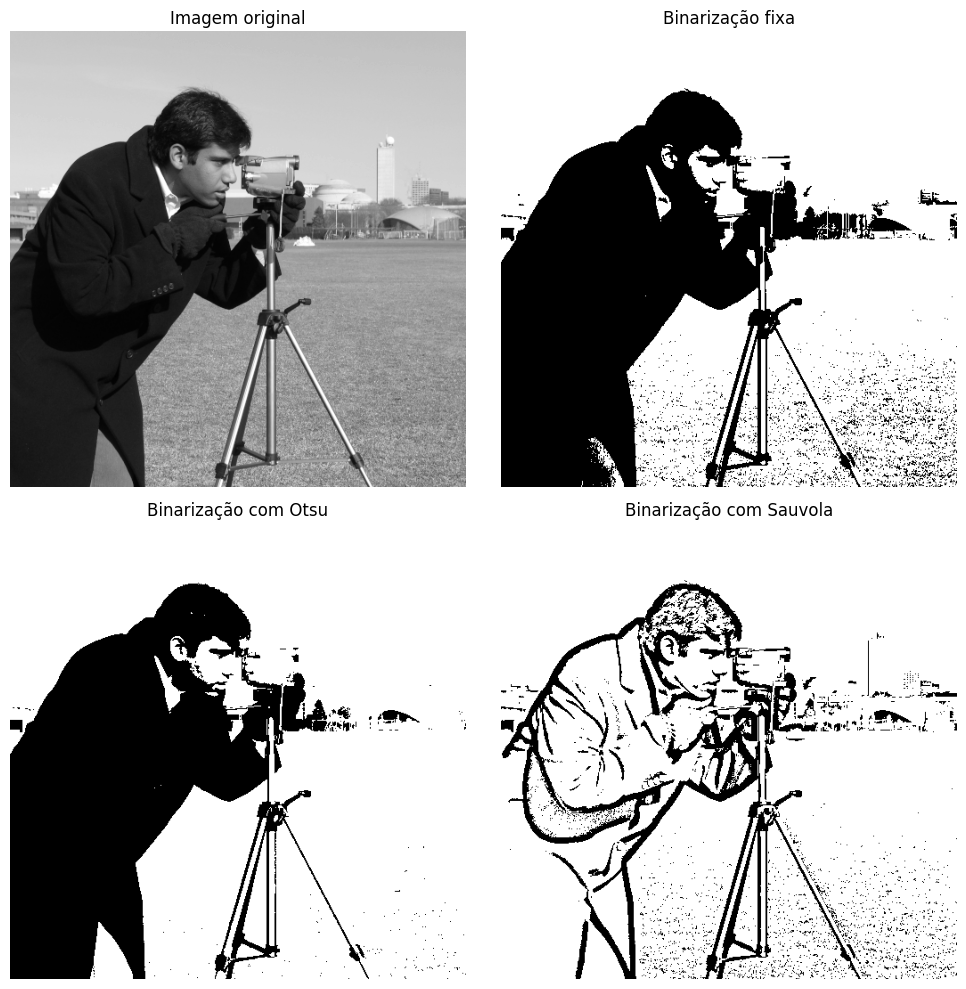

In [ ]:
from skimage import data, filters
import matplotlib.pyplot as plt

# Carregando a imagem
I = data.camera()

# Binarização com limiar fixo
limiar = 128
I_bin_fixed = I > limiar

# Binarização com Otsu
limiar_otsu = filters.threshold_otsu(I)
I_bin_otsu = I > limiar_otsu

# Binarização com Sauvola
limiar_sauvola = filters.threshold_sauvola(I)
I_bin_sauvola = I > limiar_sauvola

# Plotando as imagens
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axs[0, 0].imshow(I, cmap='gray')
axs[0, 0].set_title('Imagem original')
axs[0, 0].axis('off')

axs[0, 1].imshow(I_bin_fixed, cmap='gray')
axs[0, 1].set_title('Binarização fixa')
axs[0, 1].axis('off')

axs[1, 0].imshow(I_bin_otsu, cmap='gray')
axs[1, 0].set_title('Binarização com Otsu')
axs[1, 0].axis('off')

axs[1, 1].imshow(I_bin_sauvola, cmap='gray')
axs[1, 1].set_title('Binarização com Sauvola')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

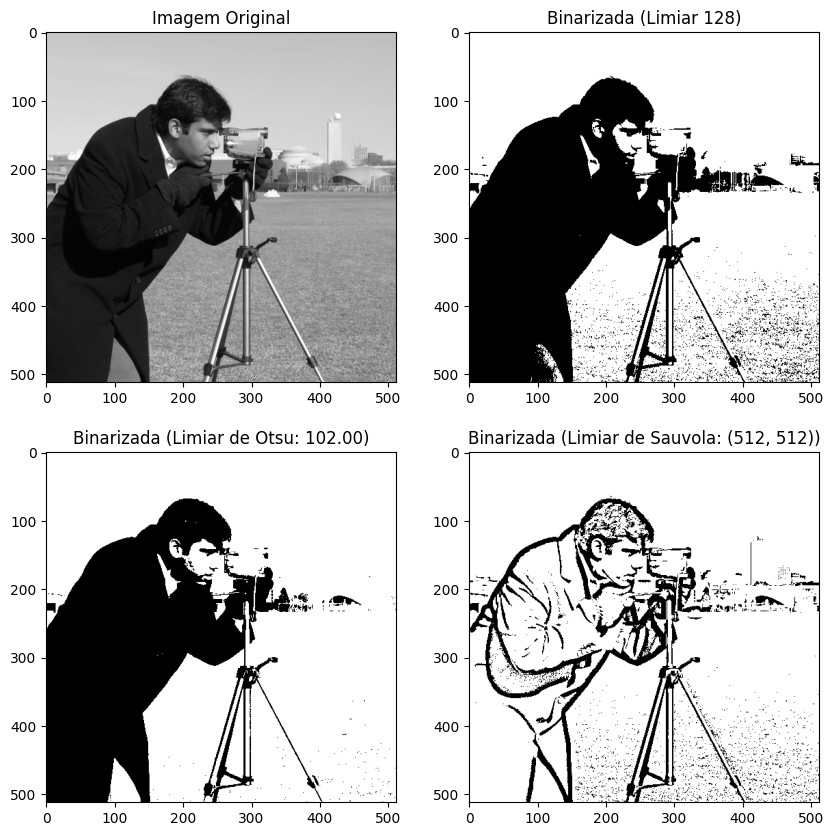

Limiar 1: 128
Limiar 2 (Otsu): 102.00
Limiar 3 (Sauvola): (512, 512)


In [ ]:
from skimage import data
from skimage.filters import threshold_otsu, threshold_sauvola
import matplotlib.pyplot as plt

# Carrega a imagem
I = data.camera()

# Calcula os limiares
limiar1 = 128
limiar2 = threshold_otsu(I)
limiar3 = threshold_sauvola(I)

# Calcula a versão binarizada
I_bin1 = I > limiar1
I_bin2 = I > limiar2
I_bin3 = I > limiar3

# Plota as imagens e seus histogramas
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(I, cmap='gray')
axs[0, 0].set_title('Imagem Original')
axs[0, 1].imshow(I_bin1, cmap='gray')
axs[0, 1].set_title('Binarizada (Limiar 128)')
axs[1, 0].imshow(I_bin2, cmap='gray')
axs[1, 0].set_title(f'Binarizada (Limiar de Otsu: {limiar2:.2f})')
axs[1, 1].imshow(I_bin3, cmap='gray')
axs[1, 1].set_title(f'Binarizada (Limiar de Sauvola: {limiar3.shape})')

plt.show()

# Imprime os limiares calculados
print(f"Limiar 1: {limiar1}")
print(f"Limiar 2 (Otsu): {limiar2:.2f}")
print(f"Limiar 3 (Sauvola): {limiar3.shape}")

In [ ]:
#g
#O método mais adequado depende dos requisitos específicos do problema em questão.

#No caso de retirar o fundo (background) da imagem, a binarização com o limiar de Otsu ou a binarização com o limiar de Sauvola podem ser mais adequadas, pois esses métodos levam em consideração as características de contraste da imagem e são capazes de ajustar o limiar de forma adaptativa.

#No caso de detectar bordas, a binarização com o limiar fixo pode ser menos adequada, pois pode ser sensível a variações de iluminação e contrastes locais. Nesse caso, o uso de algoritmos de detecção de bordas, como o Canny ou o Laplaciano, pode ser mais apropriado.

<ipython-input-25-34cd77eba25f>:5: RuntimeWarning: divide by zero encountered in log
  img_transformed = c * np.log(1 + img)


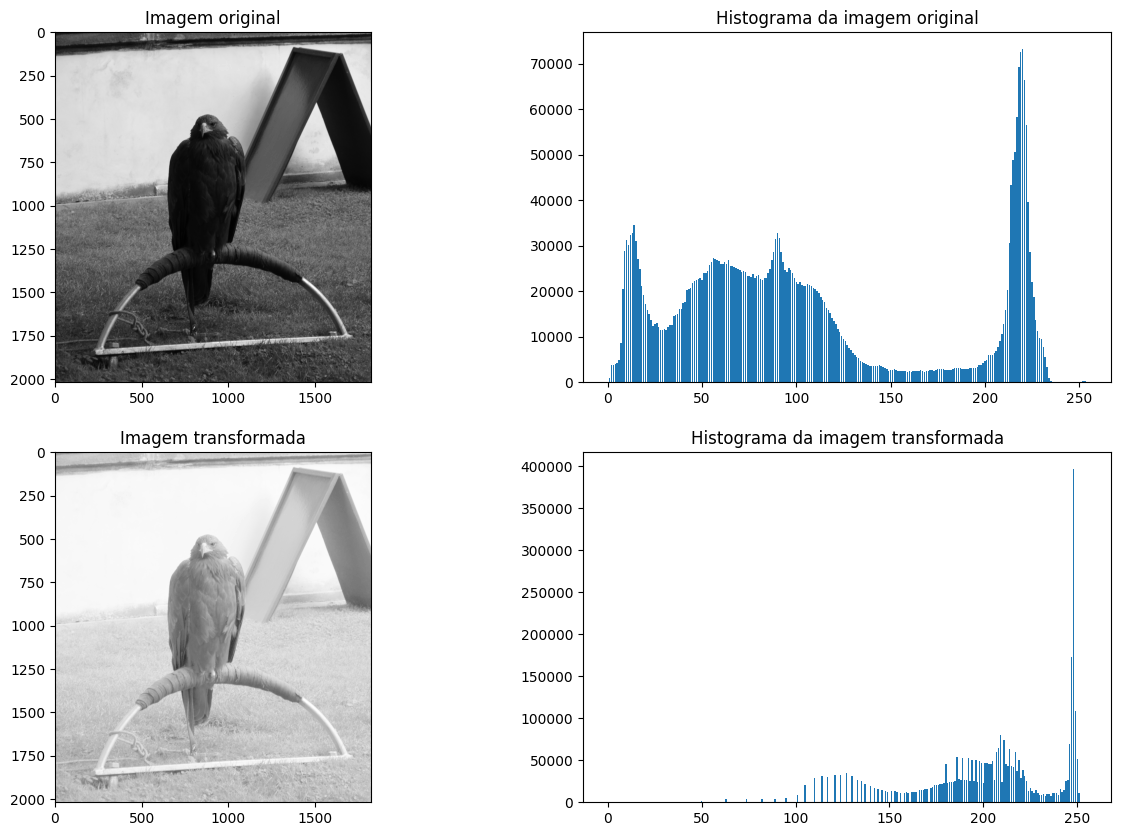

In [ ]:
from skimage.color.colorconv import rgb2gray
import numpy as np
img = data.eagle()
c = 255/(np.log(1 + np.max(img)))
img_transformed = c * np.log(1 + img)
img_transformed = np.array(img_transformed, dtype = np.uint8)
hist_img, bin_centers_img = exposure.histogram(img)
hist_axes_img = range(hist_img.shape[0])
hist_img_transformed, bin_centers_img_transformed = exposure.histogram(img_transformed)
hist_axes_img_transformed = range(hist_img_transformed.shape[0])
plt.figure(figsize=[15,10])
plt.subplot(2,2,1)
plt.title('Imagem original')
plt.imshow(img,cmap='gray')
plt.subplot(2,2,2)
plt.title('Histograma da imagem original')
plt.bar(hist_axes_img,hist_img)
plt.subplot(2,2,3)
plt.title('Imagem transformada')
plt.imshow(img_transformed,cmap='gray')
plt.subplot(2,2,4)
plt.title('Histograma da imagem transformada')
plt.bar(hist_axes_img_transformed,hist_img_transformed)
plt.show()
#O código está realizando uma transformação logarítmica na imagem carregada. Essa operação aumenta o contraste em regiões escuras da imagem e diminui o contraste em regiões claras. A principal característica dessa operação é que ela pode ser usada para melhorar a visualização de detalhes em áreas escuras da imagem, sem perder informações em áreas claras. Isso acontece porque a transformação logarítmica comprime os valores de pixel mais altos e expande os valores mais baixos.